/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Linear Regression model completed
Gradient Descent model completed
SVM Regression model completed
Naive Bayes Regression model completed
Decision Tree model completed for max-depth = 1
Decision Tree model completed for max-depth = 2
Decision Tree model completed for max-depth = 3
Decision Tree model completed for max-depth = 4
Decision Tree model completed for max-depth = 5
Decision Tree model completed for max-depth = 6
Decision Tree model completed for max-depth = 7
Decision Tree model completed for max-depth = 8
Decision Tree model completed for max-depth = 9
Decision Tree model completed for max-depth = 10
Decision Tree model completed for max-depth = 11
Decision Tree model completed for max-depth = 12
Decision Tree model completed for max-depth = 13
Decision Tree model completed for max-depth = 14
Decision Tree model completed for max-depth = 15
Decision Tree model completed for max-depth = 16
Decision Tree model completed for max-depth = 17
Decision Tree model completed for max-d

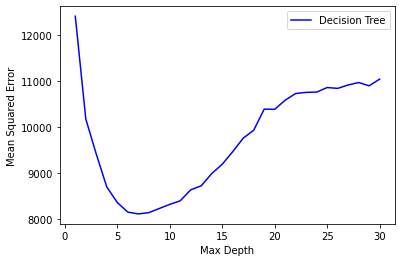

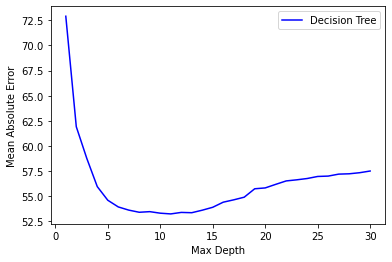

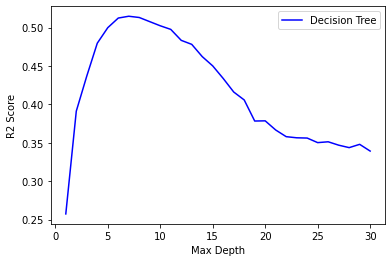

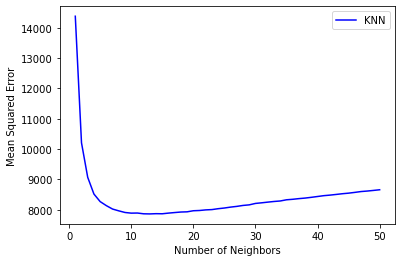

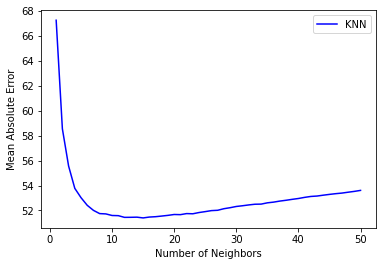

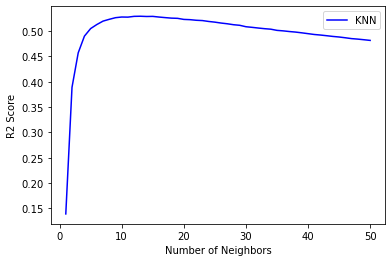

In [1]:
import sys
import csv

import matplotlib.pyplot as plt

import pydotplus

from sklearn import linear_model, tree
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.externals.six import StringIO
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Build X and Y lists
# X : Features
# Y : Target
X = []
Y = []


with open('full_table.csv', 'r') as file:
    for line in csv.reader(file, delimiter = ','):
        if len(line) == 10:
            try:
                average_rent = float(line[2])
                property_type = line[3]
                room_type = line[4]
                accommodates = int(line[5])
                bathrooms = float(line[6])
                beds = int(line[7])
                bed_type = line[8]
                price = float(line[9])

                x = {
                    'average_rent': average_rent,
                    'property_type': property_type,
                    'room_type': room_type,
                    'accommodates': accommodates,
                    'bathrooms': bathrooms,
                    'beds': beds,
                    'bed_type': bed_type
                }

                y = price

                X.append(x)
                Y.append(y)


            except:
                pass


# The DictVectorizer converts data from a dictionary to an array
vectorizer = DictVectorizer()

# Convert X to Array
X = vectorizer.fit_transform(X).toarray()

# Store Vectorizer
joblib.dump(vectorizer, 'vectorizer_no_rent.pkl')

# Split X and Y into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

# Normalizer that will normalize the data
normalizer = Normalizer().fit(X)

# Normalized Features:
X_norm = normalizer.transform(X)
#X_norm = preprocessing.normalize(X)

# Store Normalizer
joblib.dump(normalizer, 'normalizer_no_rent.pkl')

# Split X and Y into training and testing sets for normalized data
X_norm_train, X_norm_test, Y_norm_train, Y_norm_test = train_test_split(X_norm, Y, test_size=0.33)


output = []


output.append('Model, Mean Squared Error, Mean Absolute Error, R2 Score')


# Linear Regression
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print('Linear Regression model completed')

# Add to result to output
output.append('Linear Regression,{0},{1},{2}'.format(mse, mae, r2))

# Store model
joblib.dump(model, 'linear_regression_no_rent.pkl')


# Gradient Descent
model = linear_model.SGDRegressor()
model.fit(X_norm_train, Y_norm_train)
Y_pred = model.predict(X_norm_test)
mse = mean_squared_error(Y_norm_test, Y_pred)
mae = mean_absolute_error(Y_norm_test, Y_pred)
r2 = r2_score(Y_norm_test, Y_pred)
print('Gradient Descent model completed')

# Add to result to output
output.append('Gradient Descent,{0},{1},{2}'.format(mse, mae, r2))

# Store model
joblib.dump(model, 'gradient_descent_no_rent.pkll')


# Support Vector Machine Regression
model = SVR()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print('SVM Regression model completed')

output.append('Support Vector Machines,{0},{1},{2}'.format(mse, mae, r2))

# Store model
joblib.dump(model, 'svm_no_rent.pkl')

# Naive Bayes Regression
model = GaussianNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print('Naive Bayes Regression model completed')

# Add to result to output
output.append('Naive Bayes,{0},{1},{2}'.format(mse, mae, r2))

# Store model
joblib.dump(model, 'naive_bayes_no_rent.pkl')



# Decision Tree
mse_array = []
mae_array = []
r2_array = []
model_array = []

n_array = [ n + 1 for n in range(30)]

for n in n_array:
    model = DecisionTreeRegressor(max_depth=n)
    model.fit(X_train, Y_train)
    model_array.append(model)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    mse_array.append(mse)
    mae = mean_absolute_error(Y_test, Y_pred)
    mae_array.append(mae)
    r2 = r2_score(Y_test, Y_pred)
    r2_array.append(r2)
    print('Decision Tree model completed for max-depth = {0}'.format(n))


mse, index = min((mse, idx) for (idx, mse) in enumerate(mse_array))
mae = mae_array[index]
r2 = r2_array[index]

model = model_array[index]

# Store model
joblib.dump(model, 'decision_tree_no_rent.pkl')

# Store representation of decision tree
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree_no_rent_visualized.png')


output.append('Decision Tree(max-depth = {0}),{1},{2},{3}'.format(index, mse, mae, r2))


plt.figure()
plt.plot(n_array, mse_array, 'b-', label='Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.savefig('decision_tree_no_rent_mse.png.')


plt.figure()
plt.plot(n_array, mae_array, 'b-', label='Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.savefig('decision_tree_no_rent_mae.png')


plt.figure()
plt.plot(n_array, r2_array, 'b-', label='Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.legend()
plt.savefig('decision_tree_no_rent_r2.png')


# KNN
mse_array = []
mae_array = []
r2_array = []
model_array = []

n_array = [ n + 1 for n in range(50)]

for n in n_array:
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, Y_train)
    model_array.append(model)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    mse_array.append(mse)
    mae = mean_absolute_error(Y_test, Y_pred)
    mae_array.append(mae)
    r2 = r2_score(Y_test, Y_pred)
    r2_array.append(r2)
    print('KNN model completed for {0} neighbors'.format(n))

mse, index = min((mse, idx) for (idx, mse) in enumerate(mse_array))
mae = mae_array[index]
r2 = r2_array[index]

model = model_array[index]
# Store model
joblib.dump(model, 'knn_no_rent.pkl')

output.append('KNN(#neighbors = {0}),{1},{2},{3}'.format(index, mse, mae, r2))



with open('model_evaluation_no_rent.csv', 'w') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerows([row.split(',') for row in output])



plt.figure()
plt.plot(n_array, mse_array, 'b-', label='KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.savefig('KNN_no_rent_mse.png')


plt.figure()
plt.plot(n_array, mae_array, 'b-', label='KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.savefig('KNN_no_rent_mae.png')


plt.figure()
plt.plot(n_array, r2_array, 'b-', label='KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('R2 Score')
plt.legend()
plt.savefig('KNN_no_rent_r2.png')